In [1]:
import statsmodels.api as sm
import pandas as pd
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

### Import frequency file

In [2]:
dftest = pd.read_csv("/mnt/spuccio_hpcserver2/SP026_dev_cytophenograph/cluster_freq_test.txt",sep="\t",header=0)

In [3]:
dftest.head()

,Cluster,export_pt10_Bl_CD3,export_pt10_PBMC_CD3,export_pt10_Peri_CD3,export_pt10_Tum_CD3,export_pt11_Bl_CD3,export_pt11_PBMC_CD3,export_pt11_Peri_CD3,export_pt11_Tum_CD3,export_pt12_Bl_CD3,...,export_pt7_Peri_CD3,export_pt7_Tum_CD3,export_pt8_Bl_CD3,export_pt8_PBMC_CD3,export_pt8_Peri_CD3,export_pt8_Tum_CD3,export_pt9_Bl_CD3,export_pt9_PBMC_CD3,export_pt9_Peri_CD3,export_pt9_Tum_CD3
0,1,18.733333,26.733333,36.266667,40.333333,0.233333,8.219178,7.933333,51.233333,5.900000,...,4.933333,41.866667,7.166667,7.900000,17.666667,43.429603,17.566667,3.866667,20.463320,34.566667
1,2,1.233333,14.333333,0.766667,0.833333,0.000000,6.164384,0.066667,1.300000,5.366667,...,1.500000,5.300000,0.200000,18.433333,0.433333,0.433213,1.333333,11.700000,6.563707,0.866667
2,3,3.500000,3.400000,1.166667,0.733333,10.166667,44.520548,8.166667,1.466667,6.800000,...,2.700000,0.733333,5.933333,22.433333,2.433333,1.191336,10.700000,34.100000,4.826255,1.633333
3,4,6.900000,1.800000,6.966667,11.533333,14.866667,0.913242,14.533333,6.000000,15.300000,...,10.800000,10.200000,9.300000,3.433333,11.166667,12.093863,12.700000,3.500000,12.162162,8.633333
4,5,23.433333,4.166667,24.800000,5.166667,1.366667,0.684932,1.466667,1.700000,3.800000,...,7.500000,3.466667,3.333333,1.233333,4.766667,1.624549,5.300000,8.700000,6.370656,3.633333


### Get melted dataframe

In [4]:
dftest_melted = pd.melt(dftest,value_vars=['Cluster'],id_vars=dftest.columns[1:])

### Transpose

In [5]:
dftest_melted_T =  dftest_melted.T

In [6]:
dftest_melted_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
export_pt10_Bl_CD3,18.733333,1.233333,3.5,6.9,23.433333,1.933333,6.5,8.866667,5.566667,2.666667,6.166667,1.466667,1.0,2.9,4.733333,2.833333,1.433333,0.1,0.0,0.033333
export_pt10_PBMC_CD3,26.733333,14.333333,3.4,1.8,4.166667,7.0,0.9,0.166667,0.4,8.1,0.433333,17.1,0.2,12.433333,2.066667,0.1,0.0,0.5,0.0,0.166667
export_pt10_Peri_CD3,36.266667,0.766667,1.166667,6.966667,24.8,2.333333,2.7,2.266667,7.1,3.9,2.5,0.066667,0.6,0.733333,3.533333,1.7,1.9,0.566667,0.0,0.133333
export_pt10_Tum_CD3,40.333333,0.833333,0.733333,11.533333,5.166667,8.666667,3.633333,0.433333,11.1,4.933333,0.7,1.066667,0.1,0.866667,7.2,0.133333,0.8,1.333333,0.4,0.033333
export_pt11_Bl_CD3,0.233333,0.0,10.166667,14.866667,1.366667,0.266667,37.933333,4.866667,1.866667,0.066667,20.666667,0.5,3.666667,0.933333,1.466667,0.0,0.4,0.733333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
export_pt9_PBMC_CD3,3.866667,11.7,34.1,3.5,8.7,6.866667,8.766667,0.266667,0.3,3.4,1.833333,7.633333,2.633333,4.133333,1.633333,0.133333,0.133333,0.166667,0.033333,0.2
export_pt9_Peri_CD3,20.46332,6.563707,4.826255,12.162162,6.370656,3.667954,5.984556,5.212355,8.880309,4.247104,4.247104,0.19305,0.3861,3.474903,3.474903,1.930502,7.142857,0.579151,0.19305,0.0
export_pt9_Tum_CD3,34.566667,0.866667,1.633333,8.633333,3.633333,12.533333,3.7,0.7,11.5,5.266667,0.8,0.466667,0.066667,1.366667,3.4,0.266667,8.233333,1.5,0.766667,0.1
variable,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster,Cluster


### Change header and remove variable row

In [7]:
new_header = dftest_melted_T.iloc[-1] #grab the first row for the header
dftest_melted_T = dftest_melted_T[:-2] #take the data less the header row
dftest_melted_T.columns = new_header #set the header row as the df header

In [8]:
dftest_melted_T.head()

value,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
export_pt10_Bl_CD3,18.733333,1.233333,3.5,6.9,23.433333,1.933333,6.5,8.866667,5.566667,2.666667,6.166667,1.466667,1.0,2.9,4.733333,2.833333,1.433333,0.1,0.0,0.033333
export_pt10_PBMC_CD3,26.733333,14.333333,3.4,1.8,4.166667,7.0,0.9,0.166667,0.4,8.1,0.433333,17.1,0.2,12.433333,2.066667,0.1,0.0,0.5,0.0,0.166667
export_pt10_Peri_CD3,36.266667,0.766667,1.166667,6.966667,24.8,2.333333,2.7,2.266667,7.1,3.9,2.5,0.066667,0.6,0.733333,3.533333,1.7,1.9,0.566667,0.0,0.133333
export_pt10_Tum_CD3,40.333333,0.833333,0.733333,11.533333,5.166667,8.666667,3.633333,0.433333,11.1,4.933333,0.7,1.066667,0.1,0.866667,7.2,0.133333,0.8,1.333333,0.4,0.033333
export_pt11_Bl_CD3,0.233333,0.0,10.166667,14.866667,1.366667,0.266667,37.933333,4.866667,1.866667,0.066667,20.666667,0.5,3.666667,0.933333,1.466667,0.0,0.4,0.733333,0.0,0.0


### Add Tissue Label

In [9]:
dftest_melted_T["Tissue_origin"] =  dftest_melted_T.index.map(lambda x: "Blood" if "Bl" in x else "PBMC" if "PBMC" in x else "Peritumor" if "Peri" in x else "Tumor" )

<ipython-input-9-49a19b420b3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_melted_T["Tissue_origin"] =  dftest_melted_T.index.map(lambda x: "Blood" if "Bl" in x else "PBMC" if "PBMC" in x else "Peritumor" if "Peri" in x else "Tumor" )


In [10]:
dftest_melted_T

value,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Tissue_origin
export_pt10_Bl_CD3,18.733333,1.233333,3.5,6.9,23.433333,1.933333,6.5,8.866667,5.566667,2.666667,...,1.466667,1.0,2.9,4.733333,2.833333,1.433333,0.1,0.0,0.033333,Blood
export_pt10_PBMC_CD3,26.733333,14.333333,3.4,1.8,4.166667,7.0,0.9,0.166667,0.4,8.1,...,17.1,0.2,12.433333,2.066667,0.1,0.0,0.5,0.0,0.166667,PBMC
export_pt10_Peri_CD3,36.266667,0.766667,1.166667,6.966667,24.8,2.333333,2.7,2.266667,7.1,3.9,...,0.066667,0.6,0.733333,3.533333,1.7,1.9,0.566667,0.0,0.133333,Peritumor
export_pt10_Tum_CD3,40.333333,0.833333,0.733333,11.533333,5.166667,8.666667,3.633333,0.433333,11.1,4.933333,...,1.066667,0.1,0.866667,7.2,0.133333,0.8,1.333333,0.4,0.033333,Tumor
export_pt11_Bl_CD3,0.233333,0.0,10.166667,14.866667,1.366667,0.266667,37.933333,4.866667,1.866667,0.066667,...,0.5,3.666667,0.933333,1.466667,0.0,0.4,0.733333,0.0,0.0,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
export_pt8_Tum_CD3,43.429603,0.433213,1.191336,12.093863,1.624549,7.184116,4.729242,1.191336,8.953069,4.259928,...,0.361011,0.433213,0.613718,6.462094,1.083032,1.913357,2.166065,0.469314,0.108303,Tumor
export_pt9_Bl_CD3,17.566667,1.333333,10.7,12.7,5.3,1.9,7.233333,3.3,8.366667,2.9,...,0.4,1.2,4.366667,2.266667,2.866667,10.6,0.333333,0.0,0.1,Blood
export_pt9_PBMC_CD3,3.866667,11.7,34.1,3.5,8.7,6.866667,8.766667,0.266667,0.3,3.4,...,7.633333,2.633333,4.133333,1.633333,0.133333,0.133333,0.166667,0.033333,0.2,PBMC
export_pt9_Peri_CD3,20.46332,6.563707,4.826255,12.162162,6.370656,3.667954,5.984556,5.212355,8.880309,4.247104,...,0.19305,0.3861,3.474903,3.474903,1.930502,7.142857,0.579151,0.19305,0.0,Peritumor


### Plot and statistical test

In [11]:
colors = ["#2F7D75","#DDB5CF","#42B6C0","#880E0C"]
sns.set_palette(colors)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=6.750e-01 U_stat=1.840e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.332e-03 U_stat=9.650e+01
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.278e-05 U_stat=5.500e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.918e-07 U_stat=7.000e+00
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.349e-03 U_stat=8.100e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.235e-07 U_stat=4.000e+00


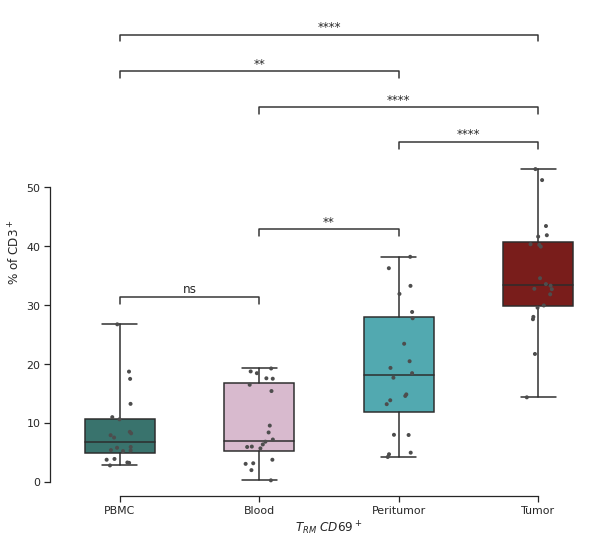

In [12]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=1, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=1, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{RM}$ $CD69^+$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=1, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C1.pdf",dpi=300,format="pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=6.786e-08 U_stat=4.000e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.460e-01 U_stat=2.030e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.790e-01 U_stat=2.405e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.436e-01 U_stat=2.355e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.209e-07 U_stat=3.920e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.786e-08 U_stat=4.000e+02


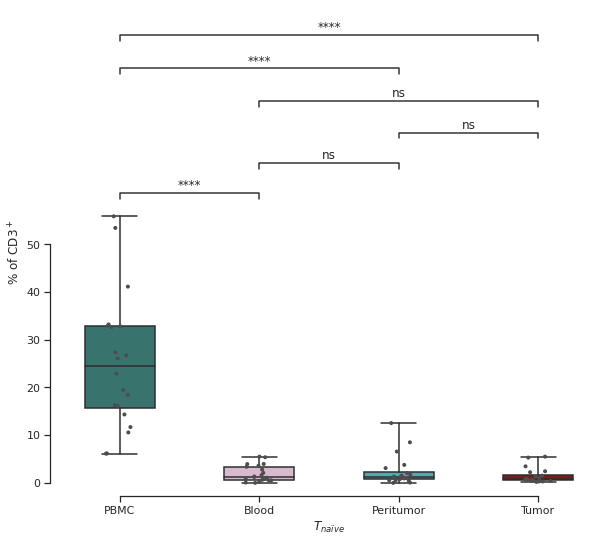

In [13]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=2, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=2, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{naïve}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=2, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C2.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=1.200e-06 U_stat=2.000e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.903e-01 U_stat=2.260e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.990e-02 U_stat=2.675e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.148e-02 U_stat=2.855e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.427e-07 U_stat=1.550e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.574e-06 U_stat=2.200e+01


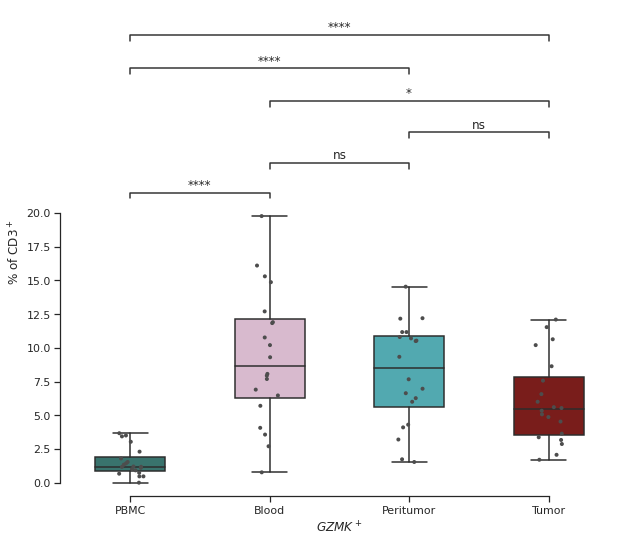

In [14]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=4, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=4, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$GZMK^+$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=4, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C4.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=9.116e-07 U_stat=3.820e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.186e-02 U_stat=1.065e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.767e-08 U_stat=0.000e+00
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.786e-08 U_stat=0.000e+00
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.828e-04 U_stat=3.295e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.302e-05 U_stat=4.300e+01


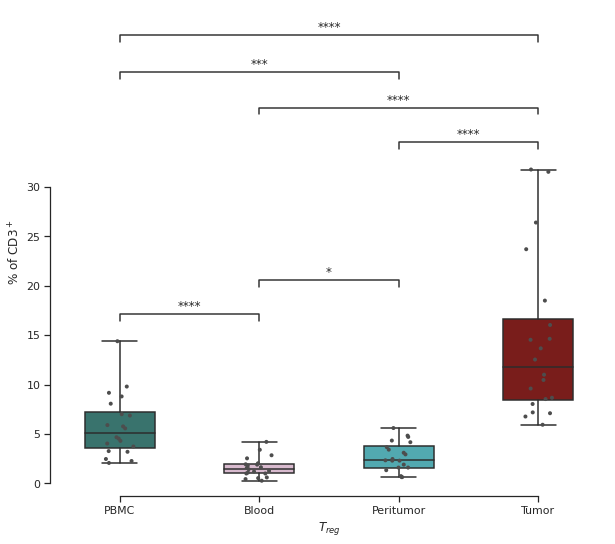

In [15]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=6, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=6, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{reg}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=6, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C6.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=6.776e-08 U_stat=4.000e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.890e-04 U_stat=3.275e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.126e-04 U_stat=6.900e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.245e-01 U_stat=1.960e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.767e-08 U_stat=4.000e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.786e-08 U_stat=4.000e+02


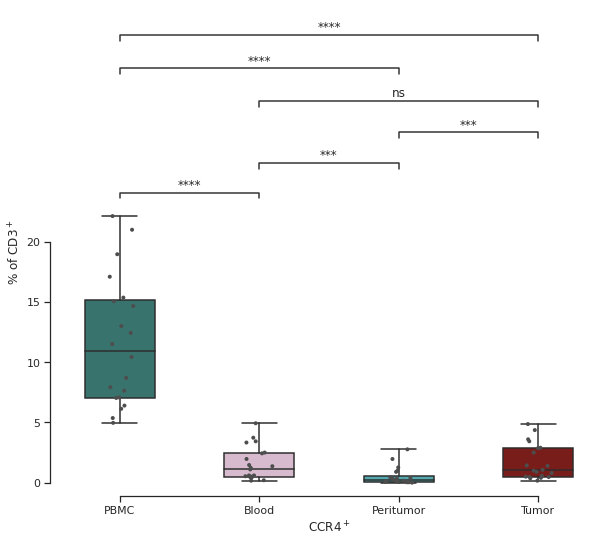

In [16]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=12, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=12, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="CCR4$^+$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=12, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C12.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=7.660e-01 U_stat=2.115e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.940e-01 U_stat=2.320e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.177e-03 U_stat=3.135e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.537e-04 U_stat=3.355e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.648e-01 U_stat=2.340e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.843e-03 U_stat=3.155e+02


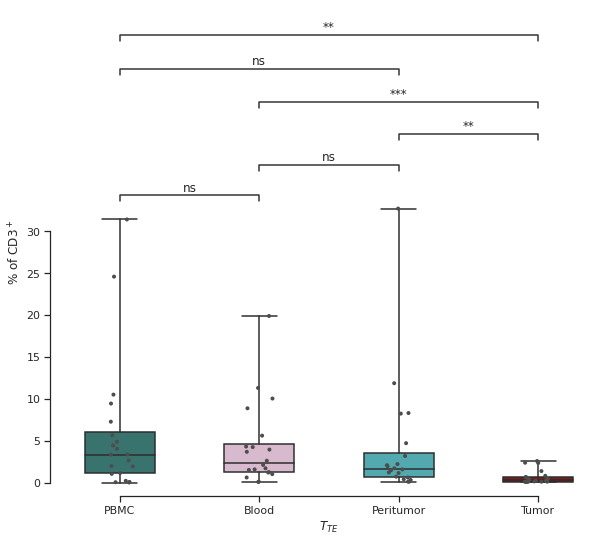

In [17]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=13, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=13, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{TE}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=13, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C13.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=4.286e-03 U_stat=9.400e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.298e-01 U_stat=1.635e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.362e-04 U_stat=6.700e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.522e-05 U_stat=5.200e+01
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.856e-03 U_stat=8.450e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.404e-07 U_stat=1.550e+01


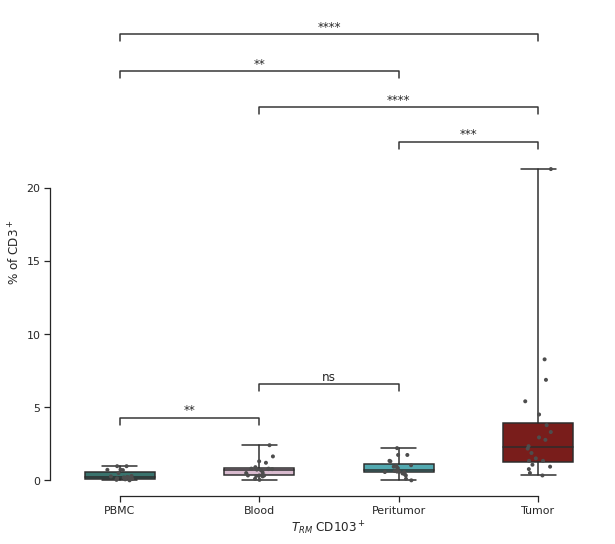

In [18]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=18, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=18, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{RM}$ CD103$^+$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=18, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C18.pdf",dpi=300,format="pdf")


### CD8

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=8.691e-03 U_stat=2.975e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.979e-02 U_stat=2.765e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.654e-04 U_stat=3.225e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.150e-06 U_stat=3.690e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.091e-04 U_stat=3.290e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.496e-06 U_stat=3.720e+02


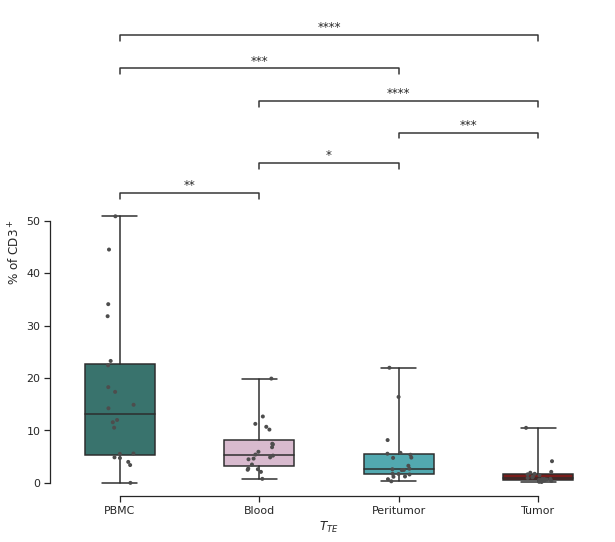

In [19]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=3, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=3, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{TE}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=3, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C3.pdf",dpi=300,format="pdf")



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=6.856e-04 U_stat=7.400e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=7.557e-01 U_stat=1.880e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=7.203e-04 U_stat=3.255e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.480e-03 U_stat=3.180e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.132e-04 U_stat=6.900e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.138e-01 U_stat=1.955e+02


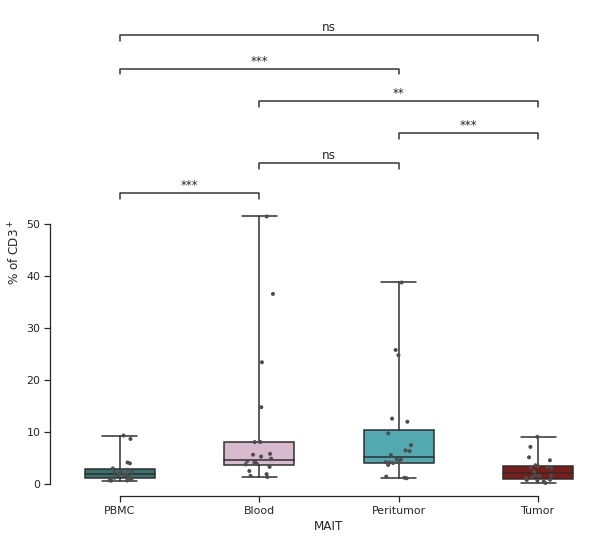

In [20]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=5, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=5, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="MAIT")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=5, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C5.pdf",dpi=300,format="pdf")



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=1.374e-06 U_stat=2.100e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.732e-01 U_stat=2.410e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.318e-03 U_stat=3.060e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.219e-04 U_stat=3.370e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.979e-06 U_stat=2.900e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.380e-04 U_stat=6.700e+01


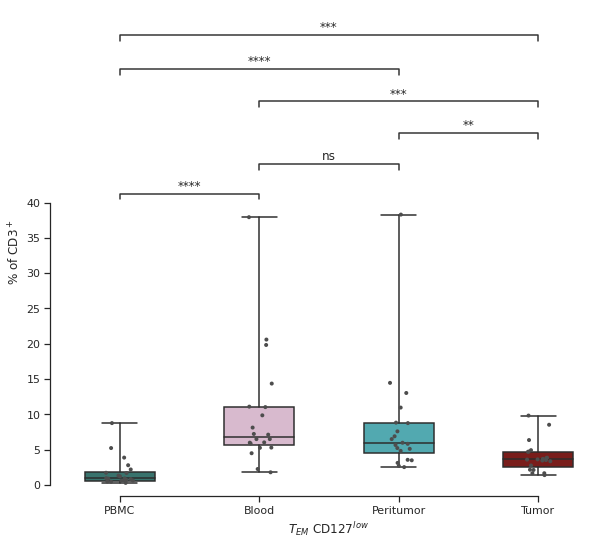

In [21]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=7, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=7, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{EM}$ CD127$^{low}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=7, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C7.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=1.029e-06 U_stat=1.900e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.559e-01 U_stat=1.575e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.231e-01 U_stat=1.425e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.072e-02 U_stat=1.140e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.861e-07 U_stat=1.200e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.681e-08 U_stat=0.000e+00


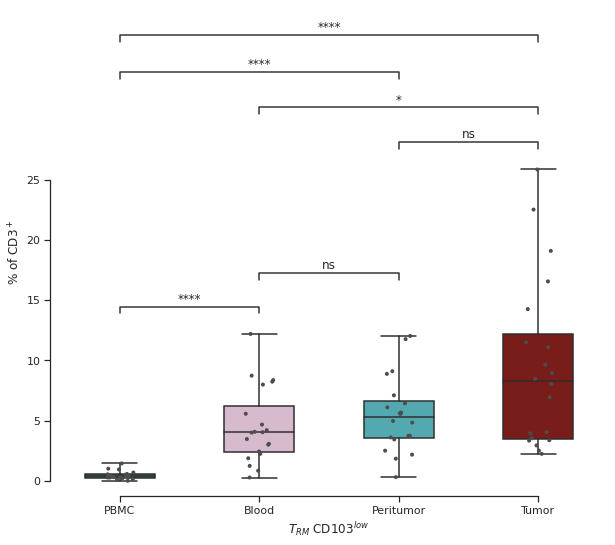

In [22]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=9, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=9, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{RM}$ CD103$^{low}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=9, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C9.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=1.197e-06 U_stat=3.800e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.478e-01 U_stat=1.460e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.189e-03 U_stat=9.050e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.944e-05 U_stat=4.950e+01
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.298e-05 U_stat=3.570e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.799e-03 U_stat=3.110e+02


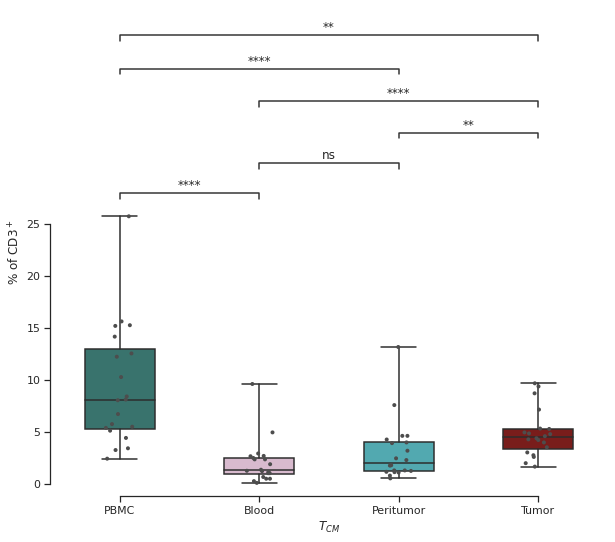

In [23]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=10, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=10, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{CM}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=10, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C10.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=7.887e-08 U_stat=1.000e+00
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.209e-04 U_stat=3.230e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.122e-08 U_stat=3.980e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.757e-08 U_stat=4.000e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=3.934e-07 U_stat=1.200e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=7.971e-01 U_stat=1.900e+02


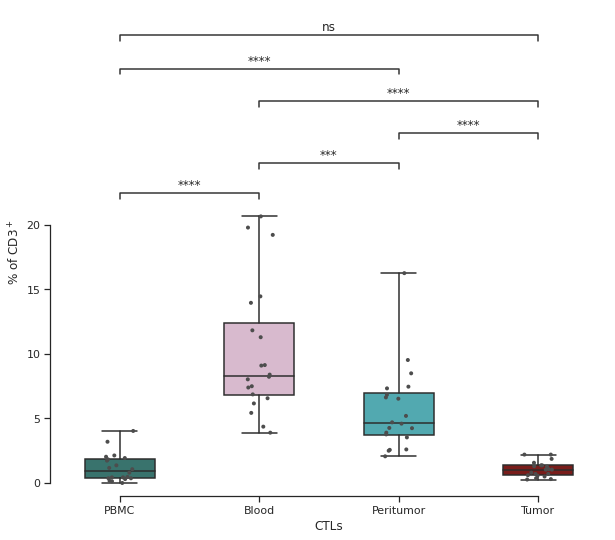

In [24]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=11, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=11, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="CTLs")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=11, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C11.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=1.988e-01 U_stat=1.520e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.652e-01 U_stat=1.725e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.017e-01 U_stat=1.685e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.988e-02 U_stat=1.325e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.829e-02 U_stat=1.265e+02
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=7.108e-03 U_stat=1.000e+02


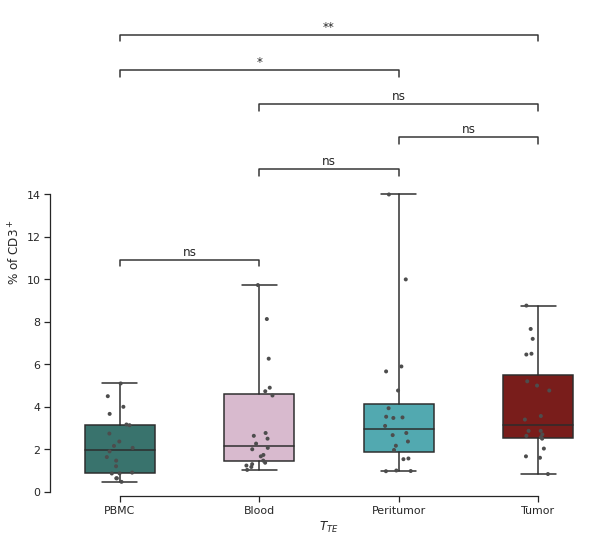

In [25]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=15, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=15, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{TE}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=15, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C15.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=3.232e-05 U_stat=4.600e+01
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.949e-01 U_stat=2.150e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=7.349e-05 U_stat=3.470e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.066e-04 U_stat=3.290e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=4.735e-06 U_stat=3.050e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.550e-01 U_stat=1.575e+02


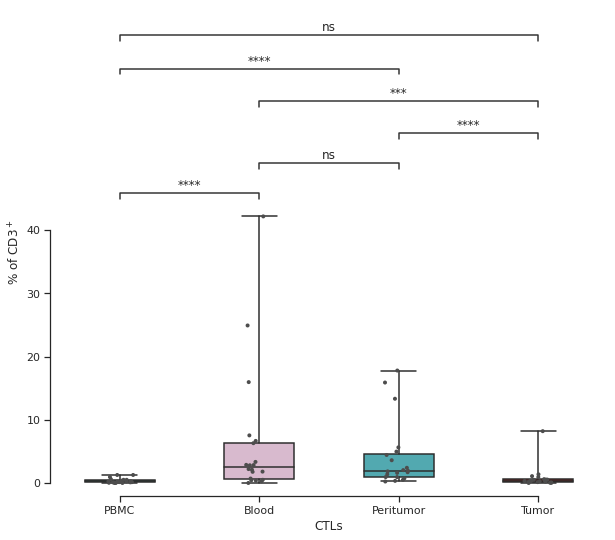

In [26]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=16, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=16, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="CTLs")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=16, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C16.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=6.349e-08 U_stat=0.000e+00
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.840e-02 U_stat=1.185e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.827e-02 U_stat=2.705e+02
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=9.461e-01 U_stat=2.030e+02
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.376e-08 U_stat=0.000e+00
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=6.877e-08 U_stat=5.000e-01


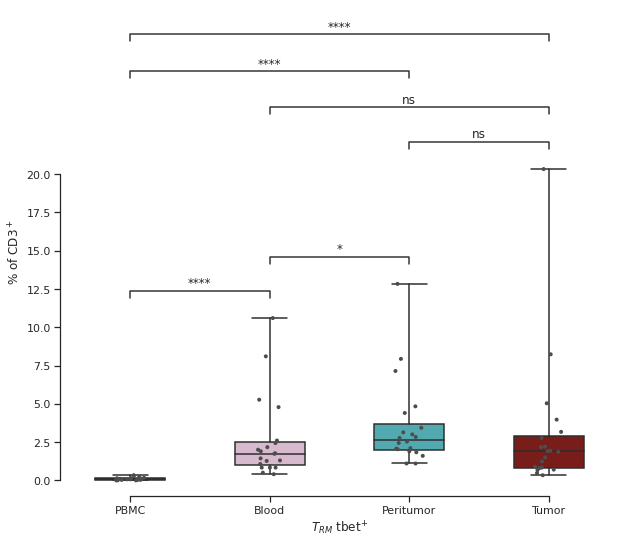

In [27]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=17, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=17, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{RM}$ tbet$^{+}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=17, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C17.pdf",dpi=300,format="pdf")


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PBMC v.s. Blood: Mann-Whitney-Wilcoxon test two-sided, P_val=9.129e-03 U_stat=1.195e+02
Blood v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.374e-01 U_stat=1.580e+02
Peritumor v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=5.900e-07 U_stat=1.600e+01
Blood v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.514e-07 U_stat=1.050e+01
PBMC v.s. Peritumor: Mann-Whitney-Wilcoxon test two-sided, P_val=1.304e-03 U_stat=9.650e+01
PBMC v.s. Tumor: Mann-Whitney-Wilcoxon test two-sided, P_val=2.449e-08 U_stat=1.500e+00


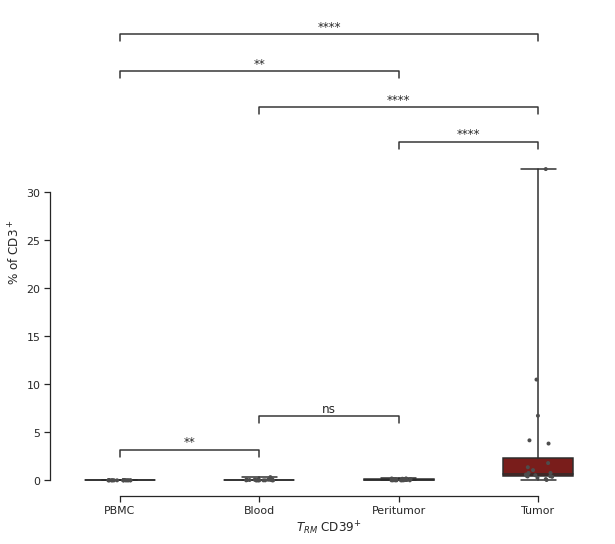

In [28]:
sns.set(rc={'font.family':'Arial', 'font.serif':'Arial'})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tissue_origin", y=19, data=dftest_melted_T,
            whis=[0, 100], width=.5, palette=sns.color_palette(colors),order=['PBMC','Blood','Peritumor','Tumor'])
# Add in points to show each observation
sns.stripplot(x="Tissue_origin", y=19, data=dftest_melted_T,order=['PBMC','Blood','Peritumor','Tumor'],
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="% of CD3$^+$")
ax.set(xlabel="$T_{RM}$ CD39$^{+}$")
sns.despine(trim=True, left=False)
add_stat_annotation(ax, data=dftest_melted_T, x="Tissue_origin", y=19, order=['PBMC','Blood','Peritumor','Tumor'],
                    box_pairs=[("Blood","PBMC"),("Blood", "Peritumor"),("Blood","Tumor"),("PBMC","Peritumor"),("PBMC","Tumor"),("Peritumor","Tumor")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2,comparisons_correction=None)
plt.savefig("/home/spuccio/C19.pdf",dpi=300,format="pdf")
